In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('bikes_train.csv') # , index_col=0 to use the datetime column as the DataFrame index
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.shape

(10886, 12)

In [4]:
data.isnull().values.any()

False

In [5]:
data.dropna()
data.shape

(10886, 12)

In [6]:
def transform_data(data):
    data.datetime = data.datetime.apply(pd.to_datetime)
    data['month'] = data.datetime.apply(lambda x : x.month)
    data['hour'] = data.datetime.apply(lambda x : x.hour)
    data['day'] = data.datetime.apply(lambda x : x.timetuple().tm_yday)
    data['dayofweek'] = data.datetime.apply(lambda x : x.isoweekday())
    data.head()
    
transform_data(data)

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data)

In [8]:
fit_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour', 'dayofweek']

In [9]:
from sklearn.preprocessing import *

model = Pipeline([#('scaler', Normalizer()),
                  ('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(train_data[fit_columns], train_data[["count"]])

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [10]:
test_predictions = model.predict(test_data[fit_columns])
test_predictions.shape

(2722, 1)

In [11]:
test_data["prediction"] = np.ravel(test_predictions)
test_data.head()

D:\lib\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayofweek,prediction
5574,2012-01-07 09:00:00,1,0,0,1,9.02,11.365,80,8.9981,14,116,130,1,9,7,6,7.381190
8285,2012-07-06 14:00:00,3,0,1,1,36.90,40.150,31,11.0014,91,184,275,7,14,188,5,400.870569
8875,2012-08-12 04:00:00,3,0,0,1,26.24,30.305,69,6.0032,2,8,10,8,4,225,7,170.834261
8375,2012-07-10 08:00:00,3,0,1,1,29.52,34.850,74,8.9981,34,615,649,7,8,192,2,207.195152
5780,2012-01-16 00:00:00,1,1,0,1,5.74,7.575,46,8.9981,2,23,25,1,0,16,1,-9.851459


In [12]:
print("The mean square error is %d" % np.mean((test_data["prediction"] - test_data["count"]) ** 2))

The mean square error is 20986


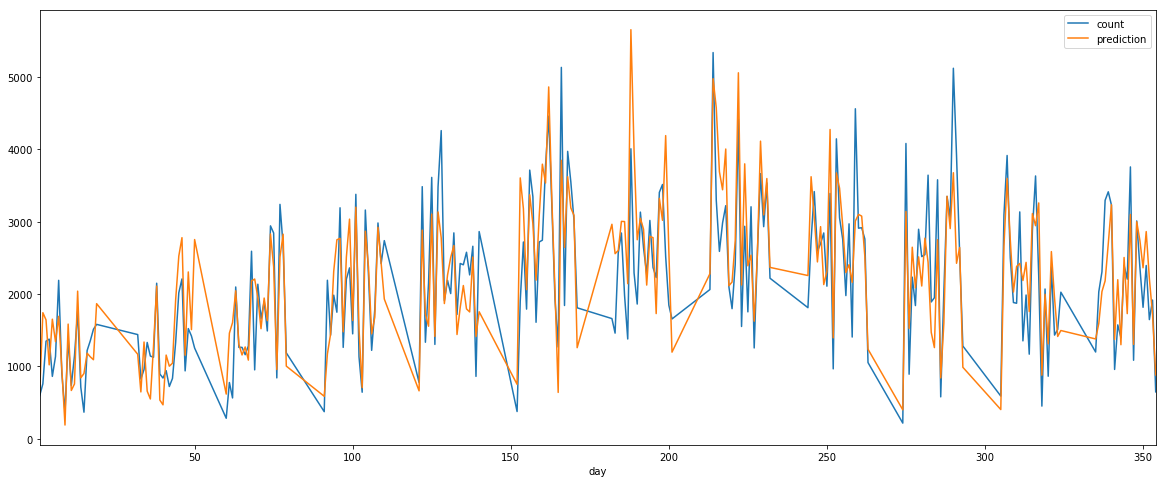

In [13]:
test_data[["day", "count", "prediction"]].groupby("day").aggregate(np.sum).plot(figsize=(20, 8))

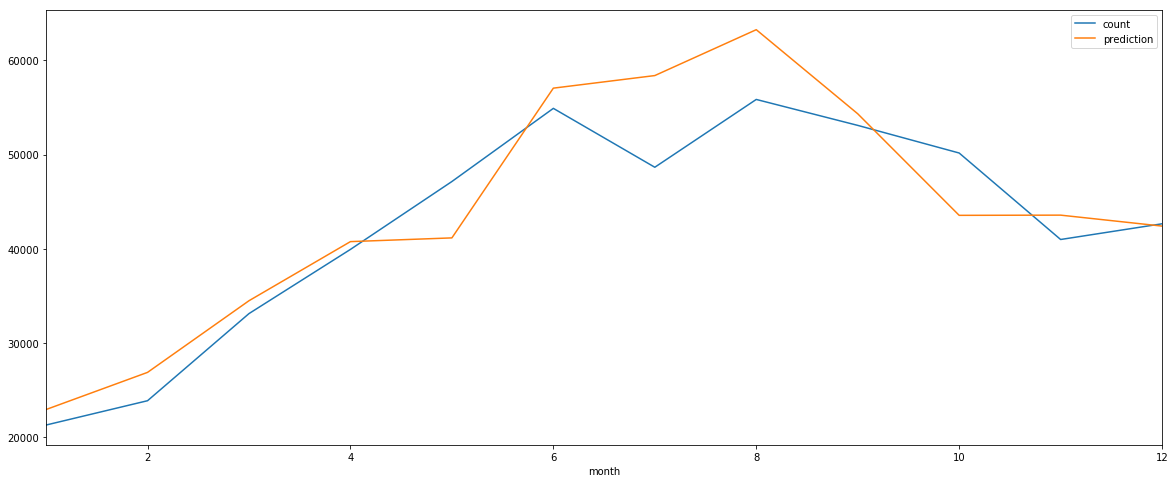

In [14]:
test_data[["month", "count", "prediction"]].groupby("month").aggregate(np.sum).plot(figsize=(20, 8))

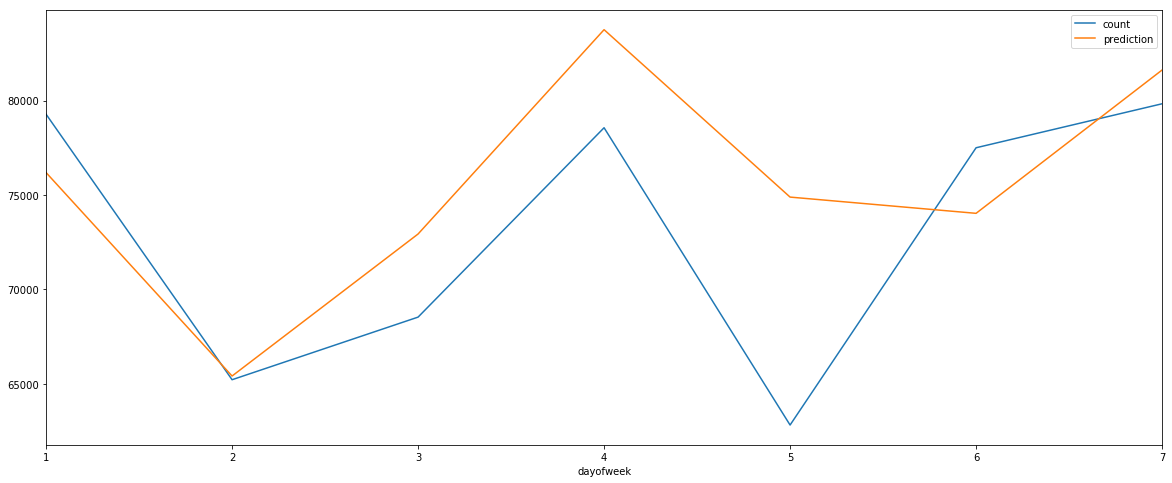

In [15]:
test_data[["dayofweek", "count", "prediction"]].groupby("dayofweek").aggregate(np.sum).plot(figsize=(20, 8))